In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,r2_score
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
corr = data.corr()

In [7]:
corr.shape

(14, 14)

In [8]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


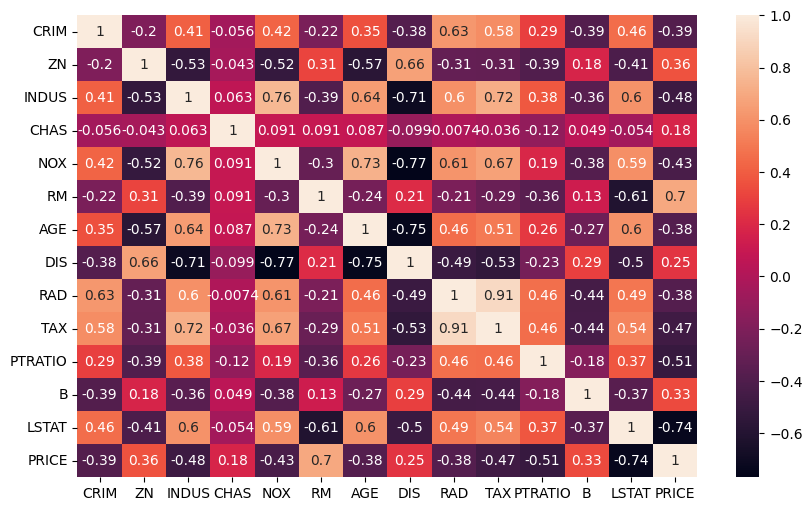

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True)
plt.show()

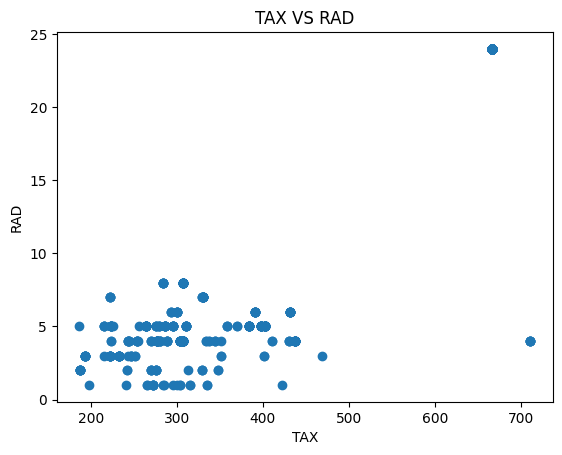

In [10]:
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX VS RAD')
plt.show()

In [11]:
X = data.drop(columns=['PRICE'],axis = 1)
y= data['PRICE']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [14]:
from sklearn.ensemble import AdaBoostRegressor

In [15]:
ada = AdaBoostRegressor()

In [16]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [17]:
y_pred = ada.predict(X_train)

In [18]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70
46,0.18836,0.0,6.91,0,0.4480,5.786,33.3,5.1004,3,233,17.9,396.90,14.15
50,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45
308,0.49298,0.0,9.90,0,0.5440,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [19]:
y_pred[:6]

array([18.82820513, 20.26097561, 20.52142857, 27.25921053, 21.21392405,
       25.72395833])

In [22]:
accuracy = r2_score(y_train,y_pred)
print("R square score",accuracy)

R square score 0.9095831882389178


In [23]:
y_test_pred = ada.predict(X_test)

In [25]:
accuracy = r2_score(y_test,y_test_pred)
print("R square score",accuracy)

R square score 0.8536960375784544


## TUNNING USING RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
params  = {'n_estimators' : [47,50,60,70],'learning_rate':[0.09,0.25,0.30] }

In [30]:
rnd_srch  =  RandomizedSearchCV(ada,cv = 5,param_distributions = params)

In [31]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [33]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=60)

In [34]:
ada = AdaBoostRegressor(learning_rate=0.3, n_estimators=60)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print("ACCURACY AFTER TUNING",r2_score(y_test,y_pred))

ACCURACY AFTER TUNING 0.8503428900435754


# GBDT

In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,r2_score
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [38]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
df.drop('target',axis = 1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

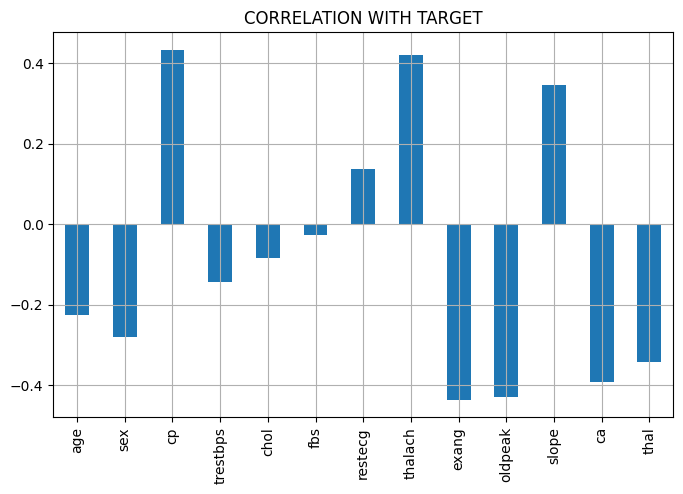

In [41]:
df.drop('target',axis = 1).corrwith(df.target).plot(kind='bar',grid=True,figsize = (8,5),title = 'CORRELATION WITH TARGET')
plt.show()

### MODEL BUILDING USING SelectPercentile features

In [42]:
from sklearn.feature_selection import SelectPercentile,chi2

In [43]:
X = df.drop('target',axis = 1)
y = df.target

sper = SelectPercentile(score_func=chi2,percentile=80)
sper = sper.fit(X,y)

In [44]:
cols = sper.get_support(indices = True)
print("feature index",cols)
features = X.columns[cols]
print('features',list(features))

feature index [ 0  1  2  3  4  7  8  9 10 11]
features ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [48]:
df_score = pd.DataFrame({'features':X.columns,'chi2score':sper.scores_,'pvalue':sper.pvalues_})
df_score.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [49]:
X = df[features]
y = df.target

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))



In [53]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)

GradientBoostingClassifier()

In [55]:
metric_score(gbdt,X_train,X_test,y_train,y_test,train = True)
metric_score(gbdt,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 100.00%
=======Test Result===========
Accuracy Score=> 83.52%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### TUNNING

In [56]:
grid_param = {
    
    
    'max_depth':range(4,8),
    
    'min_samples_split':range(2,8,2),
    'n_estimators':range(20,100,10),
    'learning_rate':np.arange(0.1,0.3)
}

In [57]:
grid = GridSearchCV(gbdt,param_grid=grid_param)
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': range(20, 100, 10)})

In [58]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 6,
 'n_estimators': 20}

In [61]:
gbdt_clf = GradientBoostingClassifier(
learning_rate= 0.1,
max_depth= 4,
min_samples_split= 6,
n_estimators= 20)
gbdt_clf.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=6, n_estimators=20)

In [62]:
metric_score(gbdt_clf,X_train,X_test,y_train,y_test,train = True)
metric_score(gbdt_clf,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 95.28%
=======Test Result===========
Accuracy Score=> 80.22%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

